## 1. CNN 실습
- MNIST 데이터셋: digits, fashion image
- MLP
- CNN

In [ ]:
#MNIST DNN Review

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# 파티셔닝: 7:3
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.3, random_state =1234)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

#min_max scaling / flattening
x_train = (x_train.reshape((num_x_train, 28*28))) / 255
x_val = (x_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28)))/ 255

#Y: one hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#모형 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (784, ) ) )
model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(16, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

# 모형 컴파일
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# 학습
history = model.fit(x_train, y_train, epochs = 10,
                    batch_size = 128, validation_data = (x_val,y_val))
history.history.keys()

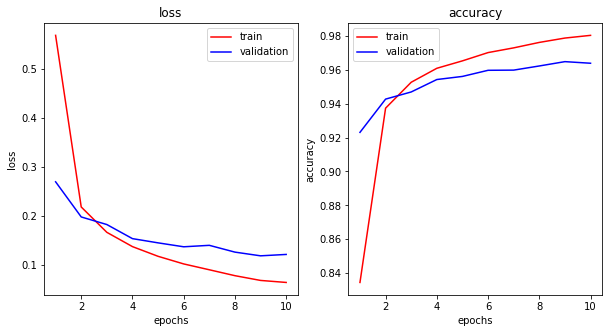

313/313 [==============================] - 0s 2ms/step - loss: 0.1274 - acc: 0.9627

               precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.92      0.97      0.94      1010
           4       0.97      0.95      0.96       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.98      0.93      0.95       974
           9       0.94      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
#학습결과 확인
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
acc = his_dict['acc']
val_acc = his_dict['val_acc']
epochs = range(1,11 ) #1~10 epoch

#plot
fig = plt.figure(figsize= (10,5) )

# loss
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'red', label = 'train')
ax1.plot(epochs, val_loss, color = 'blue', label = 'validation')
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

#accuracy
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'red', label = 'train')
ax2.plot(epochs, val_acc, color = 'blue', label = 'validation')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# 모형 평가-train, test
model.evaluate(x_test, y_test)

#분류 보고서
from sklearn.metrics import classification_report, confusion_matrix
results = model.predict(x_test)
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

In [ ]:
#CNN
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (28,28,1) #이미지 한장의 크기, 1: 흑백이미지

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
X_test[0]

11490434/11490434 [==============================] - 0s 0us/step


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
#MinMax Scaling
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#Reshape for CNN
print(X_train.shape)

X_train = X_train.reshape(X_train.shape[0],28,28,1) #4차원으로 만들어줌
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test.shape

(60000, 28, 28)


(10000, 28, 28, 1)

In [ ]:
#One hot encoding Y
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

(60000, 10)

In [ ]:
#다른 방식
model = keras.Sequential()
model.add( layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape = (28, 28, 1)) )
model.add(  layers.MaxPooling2D(pool_size=(2,2)))
model.add(  layers.Conv2D(64,kernel_size=(3,3),activation='relu') )
model.add( layers.MaxPooling2D(pool_size=(2,2)) )

model.add(  layers.Flatten() )  #3차원 이미지->한줄짜리로...

model.add( layers.Dropout(0.5) )  #drop out 50% 지정
model.add( layers.Dense(num_classes,activation='softmax') )


In [ ]:
#Compile + Fit
batch_size = 128
epoch =10
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epoch, validation_split=0.1)
#한 epoch, X_train의 10%를 random하게 선택해서 validation에 사용


Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0582 - accuracy: 0.9819 - val_loss: 0.0337 - val_accuracy: 0.9903
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0520 - accuracy: 0.9838 - val_loss: 0.0325 - val_accuracy: 0.9913
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0478 - accuracy: 0.9844 - val_loss: 0.0313 - val_accuracy: 0.9913
Epoch 4/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.0307 - val_accuracy: 0.9923
Epoch 5/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0409 - accuracy: 0.9865 - val_loss: 0.0303 - val_accuracy: 0.9912
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0289 - val_accuracy: 0.9922
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.0282 - val_accuracy: 0.9928
Epoch 

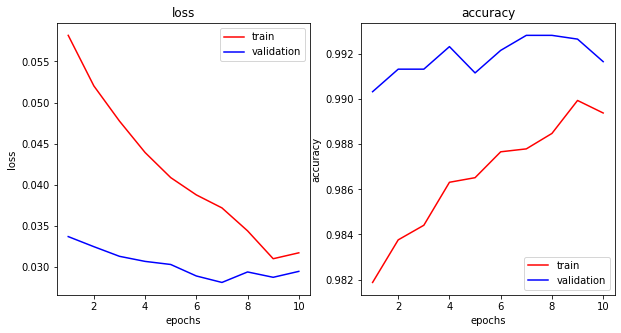

313/313 [==============================] - 1s 2ms/step

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
#학습결과 확인
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']
epochs = np.arange(epoch)+1

#plot
fig = plt.figure(figsize= (10,5) )

# loss
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'red', label = 'train')
ax1.plot(epochs, val_loss, color = 'blue', label = 'validation')
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

#accuracy
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'red', label = 'train')
ax2.plot(epochs, val_acc, color = 'blue', label = 'validation')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# 모형 평가-train, test
model.evaluate(X_test, y_test)

#분류 보고서
from sklearn.metrics import classification_report, confusion_matrix
results = model.predict(X_test)
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))



## 2. Fashion Image Dataset
- 아래 예제를 참고하셔서 CNN을 적용하세요
- fully connected 부분에 은닉층을 추가해보세요
- Conv에서 필터 크기를 키워보세요
- Conv에서 필터 개수를 조정해보세요.

(60000, 28, 28, 1)


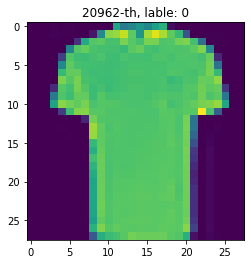

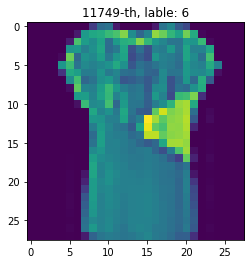

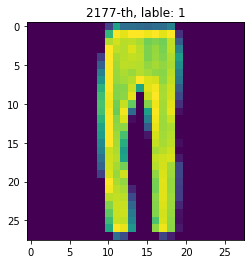

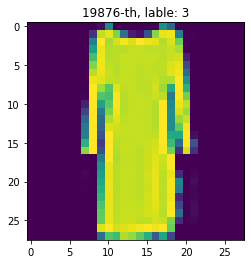

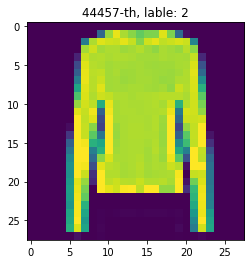

In [ ]:
#Fashion Image Dataset
from tensorflow.keras.datasets import fashion_mnist

# mnist의 패션 데이터
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(12345)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 5
# 0 ~ 59999 중 무작위 5개
random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th, lable: %d' %(idx, label))

#표준화 및 reshape, 각 이미지가 28,28,1이 되도록 ->4차원 array를 생성
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1)) #-1은 원래 array의 개수를 따름, 60000개 의미
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1)) #-1은 10000개 의미

print(x_train.shape)
from tensorflow.keras.utils import to_categorical
# Y 원핫인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# validation 생성
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3, random_state = 12345)

In [ ]:
x_train.shape
y_train.shape

(42000, 10)

In [ ]:
#모델링
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,BatchNormalization

model = Sequential( )
model.add( Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu',
                  input_shape = (28, 28, 1)) ) #가로, 세로, 채널
model.add( BatchNormalization() )	#레이어 입력의 평균, 분산 조정, 그라디언트소실 방지
model.add( MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same') ) #크기 감소
model.add( Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'))
model.add( BatchNormalization() )
model.add( MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same') )
model.add( Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'))
model.add( MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add( Flatten())  # Dense를 위해 2차원 데이터로 변형
model.add(  Dense(64, activation = 'relu') )
model.add( Dense(10, activation = 'softmax'))


#list 형태 모델링(위와 동일)
model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태를 명시해주어야 합니다.
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)), #widthXheightXChannel
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

#model.summary()

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train, epochs = 5,
                    validation_data=(x_val, y_val))



Epoch 1/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4107 - acc: 0.8503 - val_loss: 0.2968 - val_acc: 0.8905
Epoch 2/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2782 - acc: 0.8985 - val_loss: 0.2596 - val_acc: 0.9053
Epoch 3/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2386 - acc: 0.9111 - val_loss: 0.2447 - val_acc: 0.9105
Epoch 4/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2069 - acc: 0.9232 - val_loss: 0.2512 - val_acc: 0.9067
Epoch 5/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1847 - acc: 0.9310 - val_loss: 0.2422 - val_acc: 0.9151


- fashion 데이터 셋에 대해서, 위의 CNN을 수정해서 실행해보세요.
- conv+pool을 추가 또는 줄이셔도 됨
- fully connected 부분에 은닉층을 추가해보세요
- epoch 조정
- validation_split=0.1을 지정

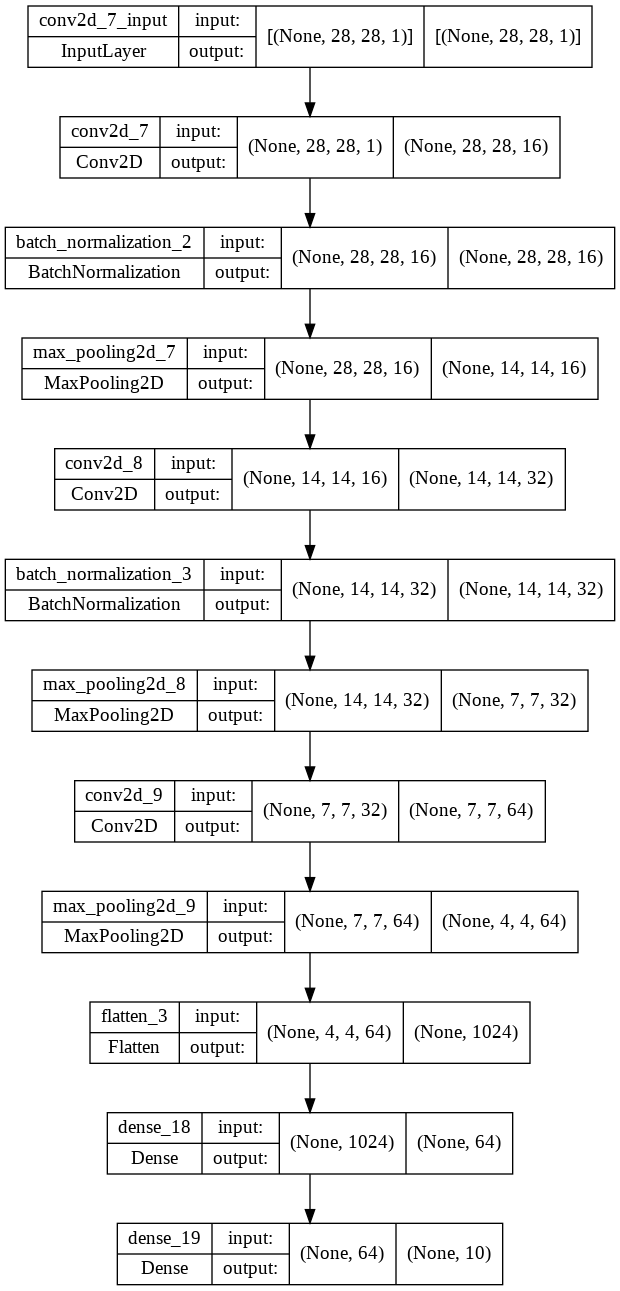

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)


In [ ]:
#Conv+Pool, Drop Out 추가
from tensorflow.keras.layers import Dropout
model1 = Sequential( )
model1.add( Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)) )
model1.add( BatchNormalization() )
model1.add( Conv2D(32,(3,3),padding='same', activation= 'relu') )
model1.add( BatchNormalization() )
model1.add( MaxPool2D(pool_size = (2, 2), padding = 'same') )
model1.add( Dropout(0.25) )

model1.add( Conv2D(64,(3,3),padding='same',activation = 'relu') )
model1.add( BatchNormalization() )
model1.add( Conv2D(64,(3,3),padding = 'same',activation= 'relu') )
model1.add( BatchNormalization() )
model1.add( MaxPool2D(pool_size=(2,2),padding = 'same'))
model1.add( Dropout(0.25))

model1.add( Conv2D(128,(3,3),padding='same',activation = 'relu') )
model1.add( BatchNormalization() )
model1.add( Conv2D(128,(3,3),padding = 'same',activation= 'relu') )
model1.add( BatchNormalization() )
model1.add( MaxPool2D(pool_size=(2,2),padding = 'same'))
model1.add( Dropout(0.5))

model1.add( Flatten() )
model1.add( Dense(256,activation='relu'))
model1.add( BatchNormalization())
model1.add( Dropout(0.5))
model1.add( Dense(10,activation='softmax'))

model1.summary()

model1.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

history1 = model1.fit(x_train, y_train, epochs = 1, validation_split=0.1)


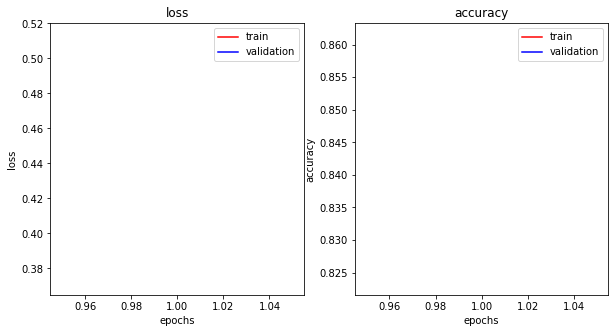

In [ ]:
#학습결과 확인
import matplotlib.pyplot as plt
his_dict = history1.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
acc = his_dict['acc']
val_acc = his_dict['val_acc']
epochs = np.arange(1 )+1 #추후 epoch 늘려서 조정

#plot
fig = plt.figure(figsize= (10,5) )

# loss
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'red', label = 'train')
ax1.plot(epochs, val_loss, color = 'blue', label = 'validation')
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

#accuracy
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'red', label = 'train')
ax2.plot(epochs, val_acc, color = 'blue', label = 'validation')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

## 3. Cifar-10 데이터셋으로 분류모형 생성
- MLP 생성
- 실제 사진에 적용

# 실습
1. 아래 코드를 참고하셔서, DNN, CNN을 개선해보세요!
2. 온라인에서 자동차사진을 받으셔서, DNN과 CNN에서 각각 예측을 해보세요

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

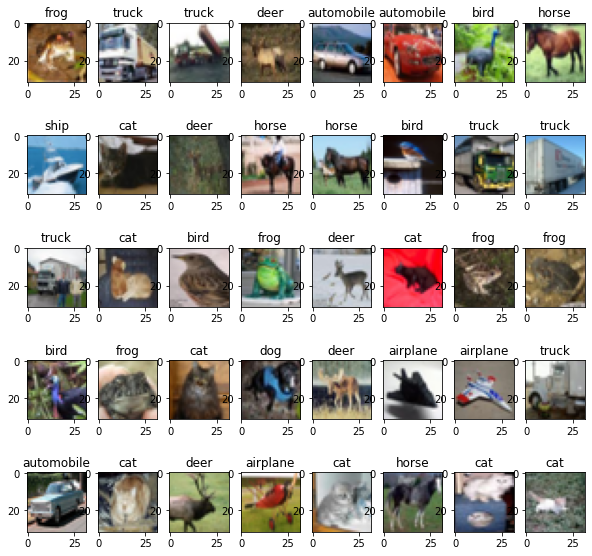

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

#합성, rotate, 뒤집기, resize

plt.figure(figsize=(10, 10))
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(0, 40):
    im = Image.fromarray(X_train[i])
    plt.subplot(5, 8, i + 1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off",bottom="off") # x축 제거
    plt.tick_params(labelleft="off",left="off") # y축 제거
    plt.imshow(im)

plt.show()

In [ ]:
X_train[0]

In [ ]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 1차원 배열로 변환하기 --- (*2)
X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255
# 타겟변수를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

X_train.shape

(50000, 3072)

In [ ]:
# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(im_size,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# 모델 컴파일하기 --- (*4)
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_split=0.1)

Epoch 1/5
1407/1407 [==============================] - 11s 5ms/step - loss: 1.9076 - accuracy: 0.3019 - val_loss: 1.7369 - val_accuracy: 0.3808
Epoch 2/5
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7144 - accuracy: 0.3828 - val_loss: 1.6693 - val_accuracy: 0.4056
Epoch 3/5
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6225 - accuracy: 0.4189 - val_loss: 1.6177 - val_accuracy: 0.4186
Epoch 4/5
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5616 - accuracy: 0.4410 - val_loss: 1.6280 - val_accuracy: 0.4118
Epoch 5/5
1407/1407 [==============================] - 6s 5ms/step - loss: 1.5196 - accuracy: 0.4553 - val_loss: 1.5311 - val_accuracy: 0.4570


In [ ]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


313/313 [==============================] - 1s 3ms/step - loss: 1.5096 - accuracy: 0.4631
정답률= 0.46309998631477356 loss= 1.5096185207366943


In [ ]:
hist.history

{'accuracy': [0.30186668038368225,
  0.38277778029441833,
  0.4189110994338989,
  0.4410444498062134,
  0.45533332228660583],
 'loss': [1.907586932182312,
  1.714409589767456,
  1.6225048303604126,
  1.5616487264633179,
  1.5196301937103271],
 'val_accuracy': [0.3808000087738037,
  0.40560001134872437,
  0.4185999929904938,
  0.41179999709129333,
  0.4569999873638153],
 'val_loss': [1.7368528842926025,
  1.6693345308303833,
  1.6177483797073364,
  1.6279730796813965,
  1.5311170816421509]}

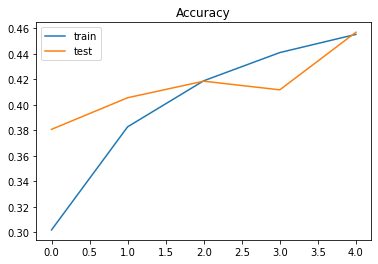

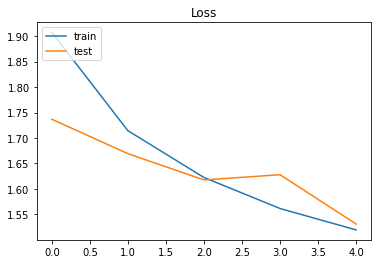

In [ ]:
# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 모형 저장: 가중치의 저장

In [ ]:
model.save_weights('cifar10-weight.h5')

In [ ]:
model.summary()

# 실제 사진에의 적용

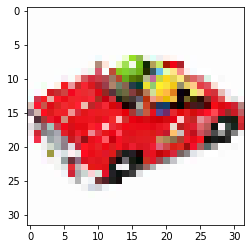

In [ ]:
import cv2
import numpy as np
# 레이블 정보
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 모델 데이터 읽어 들이기
model.load_weights('cifar10-weight.h5')

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('download.jfif')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

In [ ]:
# MLP로 학습한 이미지 데이터에 형태 맞추기
im = im.reshape(im_size).astype('float32') / 255
# 예측하기
r = model.predict(np.array([im]), batch_size=32,verbose=1)


1/1 [==============================] - 0s 22ms/step


In [ ]:
res = r[0]
# 결과 출력하기
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("예측한 결과=", labels[res.argmax()])

airplane = 0
automobile = 71
bird = 0
cat = 0
deer = 0
dog = 0
frog = 0
horse = 0
ship = 1
truck = 26
---
예측한 결과= automobile


In [ ]:
import numpy as np
print(np.array([1, 0, 9, 3]).argmax()) # 결과 → 2
print(np.array([1, 3, 2, 9]).argmax()) # 결과 → 3
print(np.array([9, 0, 2, 3]).argmax()) # 결과 → 0

2
3
0


# 실습 1
- 위의 모형의 은닉층 구조를 변경하여 모형을 개선해보세요.
- epoch의 수를 늘려서 테스트해보세요
- 예제 파일인 test-car.jpg 대신, 위 데이터셋의 범주에 해당하는 다른 이미지를 넣어서 테스트해보세요.

# 4. 동일 데이터에 대한 CNN 적용

In [ ]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 정규화하기 --- (*2)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=5,
    verbose=1,
    validation_split=0.1)


Epoch 1/5
1407/1407 [==============================] - 18s 6ms/step - loss: 1.5172 - accuracy: 0.4482 - val_loss: 1.1825 - val_accuracy: 0.5838
Epoch 2/5
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1195 - accuracy: 0.5998 - val_loss: 0.8958 - val_accuracy: 0.6810
Epoch 3/5
1407/1407 [==============================] - 9s 6ms/step - loss: 0.9613 - accuracy: 0.6603 - val_loss: 0.8181 - val_accuracy: 0.7120
Epoch 4/5
1407/1407 [==============================] - 9s 6ms/step - loss: 0.8744 - accuracy: 0.6918 - val_loss: 0.7394 - val_accuracy: 0.7458
Epoch 5/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7981 - accuracy: 0.7180 - val_loss: 0.7539 - val_accuracy: 0.7364


313/313 [==============================] - 1s 4ms/step - loss: 0.7897 - accuracy: 0.7150
정답률= 0.7149999737739563 loss= 0.7897018194198608


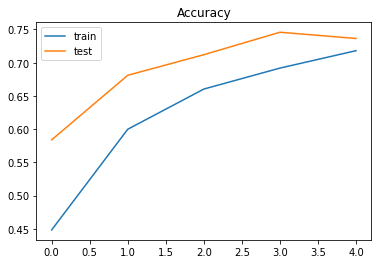

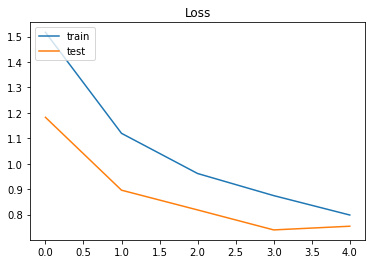

In [ ]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('cifar10-cnn-weight.h5')

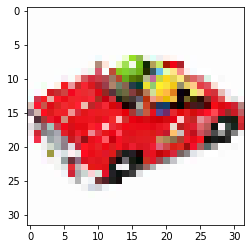

In [ ]:
import cv2
import numpy as np
# 레이블 정보
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 모델 데이터 읽어 들이기
model.load_weights('cifar10-cnn-weight.h5')

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('download.jfif')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

In [ ]:
# MLP로 학습한 이미지 데이터에 형태 맞추기
im = im.astype('float32') / 255
# 예측하기
r = model.predict(np.array([im]), batch_size=32,verbose=1)


1/1 [==============================] - 0s 124ms/step


In [ ]:
res = r[0]
# 결과 출력하기
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("예측한 결과=", labels[res.argmax()])

airplane = 0
automobile = 7
bird = 0
cat = 0
deer = 0
dog = 0
frog = 0
horse = 0
ship = 0
truck = 92
---
예측한 결과= truck


# 실습 2
- CNN의 은닉층 구조를 개선해보세요
- epoch를 늘려보세요
- 새롭게 얻은 모형의 가중치를 저장해보세요.

#실습3

In [2]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.2 MB/s eta 0:00:00


In [16]:
import optuna
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

img_rows, img_cols = 28, 28
num_classes = 10

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)

# 파티셔닝: 7:3
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.3, random_state =1234)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

#min_max scaling / flattening
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

#Y: one hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [17]:
#define the CNN model
def create_model(num_layer, mid_units, num_filters,dropout_rate):

    model = Sequential()
    model.add(Conv2D(filters=num_filters[0], kernel_size=(3, 3),
                 activation="relu",
                 input_shape=(img_rows, img_cols, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    for i in range(1,num_layer):
        model.add(Conv2D(filters=num_filters[i], kernel_size=(3,3), padding="same", activation="relu"))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate[0]))
    model.add(Flatten())
    model.add(Dense(mid_units))
    model.add(Dropout(dropout_rate[1]))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [18]:
def objective(trial):
    #clear_session
    keras.backend.clear_session()

    #number of layer
    num_layer = trial.suggest_int("num_layer", 2, 5)

    #FC 레이어 유닛 수
    #number of the unit
    mid_units = int(trial.suggest_discrete_uniform("mid_units", 100, 300, 100))

    #각 컨볼루션 레이어의 필터 수
    #number of the each convolution layer filter
    num_filters = [int(trial.suggest_discrete_uniform("num_filter_"+str(i), 16, 128, 16)) for i in range(num_layer)]
    #activation = trial.suggest_categorical("activation", ["relu", "sigmoid"])

    #Dropout
    #dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
    #dropout_rate = [int(trial.suggest_uniform("dropout_rate"+str(ii), 0.0, 0.5)) for ii in range(2)]
    dropout_rate = [0] * 2
    dropout_rate[0] = trial.suggest_uniform('dropout_rate'+str(0), 0.0, 0.5)
    dropout_rate[1] = trial.suggest_uniform('dropout_rate'+str(1), 0.0, 0.5)

    #optimizer
    optimizer = trial.suggest_categorical("optimizer", ["sgd", "adam"])

    model = create_model(num_layer, mid_units, num_filters,dropout_rate)
    model.compile(optimizer=optimizer,
          loss="categorical_crossentropy",
          metrics=["acc"])

    history = model.fit(x_train, y_train, verbose=0, epochs=20, batch_size=128, validation_split=0.1)

    scores = model.evaluate(x_train, y_train)
    print('accuracy={}'.format(*scores))

    score = model.evaluate(x_test, y_test, verbose=0)[1]
    return score


In [19]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2023-08-10 16:15:07,365] A new study created in memory with name: no-name-9e4c3c1e-c369-4f13-b317-b7592e13176e
<ipython-input-18-62128aec6061>:10: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  mid_units = int(trial.suggest_discrete_uniform("mid_units", 100, 300, 100))
<ipython-input-18-62128aec6061>:14: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.
  num_filters = [int(trial.suggest_discrete_uniform("num_filter_"+str(i), 16, 128, 16)) for i in range(num_layer)]
<ipython-input-18-62128aec6061>:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0198 - acc: 0.9941
accuracy=0.01984739676117897


[I 2023-08-10 16:15:45,203] Trial 0 finished with value: 0.9905999898910522 and parameters: {'num_layer': 2, 'mid_units': 100.0, 'num_filter_0': 48.0, 'num_filter_1': 16.0, 'dropout_rate0': 0.24567740362523938, 'dropout_rate1': 0.4492333152988763, 'optimizer': 'adam'}. Best is trial 0 with value: 0.9905999898910522.


1313/1313 [==============================] - 4s 3ms/step - loss: 0.0628 - acc: 0.9810
accuracy=0.06284314393997192


[I 2023-08-10 16:17:14,375] Trial 1 finished with value: 0.9825000166893005 and parameters: {'num_layer': 3, 'mid_units': 200.0, 'num_filter_0': 32.0, 'num_filter_1': 112.0, 'num_filter_2': 48.0, 'dropout_rate0': 0.4772433848696873, 'dropout_rate1': 0.33889625685522573, 'optimizer': 'sgd'}. Best is trial 0 with value: 0.9905999898910522.


1313/1313 [==============================] - 5s 4ms/step - loss: 0.0077 - acc: 0.9985
accuracy=0.007741875946521759


[I 2023-08-10 16:19:07,068] Trial 2 finished with value: 0.9929999709129333 and parameters: {'num_layer': 4, 'mid_units': 300.0, 'num_filter_0': 112.0, 'num_filter_1': 80.0, 'num_filter_2': 128.0, 'num_filter_3': 96.0, 'dropout_rate0': 0.2271036734113669, 'dropout_rate1': 0.16768517935478827, 'optimizer': 'adam'}. Best is trial 2 with value: 0.9929999709129333.


1313/1313 [==============================] - 5s 4ms/step - loss: 0.0766 - acc: 0.9776
accuracy=0.07656767219305038


[I 2023-08-10 16:20:01,763] Trial 3 finished with value: 0.9783999919891357 and parameters: {'num_layer': 2, 'mid_units': 300.0, 'num_filter_0': 64.0, 'num_filter_1': 112.0, 'dropout_rate0': 0.37826921769290117, 'dropout_rate1': 0.43950067974326595, 'optimizer': 'sgd'}. Best is trial 2 with value: 0.9929999709129333.


1313/1313 [==============================] - 4s 3ms/step - loss: 0.0444 - acc: 0.9870
accuracy=0.044408030807971954


[I 2023-08-10 16:21:09,327] Trial 4 finished with value: 0.9866999983787537 and parameters: {'num_layer': 4, 'mid_units': 100.0, 'num_filter_0': 16.0, 'num_filter_1': 64.0, 'num_filter_2': 96.0, 'num_filter_3': 96.0, 'dropout_rate0': 0.36156451331541034, 'dropout_rate1': 0.24932406899005766, 'optimizer': 'sgd'}. Best is trial 2 with value: 0.9929999709129333.


1313/1313 [==============================] - 5s 3ms/step - loss: 0.0120 - acc: 0.9966
accuracy=0.012025267817080021


[I 2023-08-10 16:22:24,668] Trial 5 finished with value: 0.9908000230789185 and parameters: {'num_layer': 5, 'mid_units': 200.0, 'num_filter_0': 64.0, 'num_filter_1': 80.0, 'num_filter_2': 16.0, 'num_filter_3': 64.0, 'num_filter_4': 64.0, 'dropout_rate0': 0.4349442492375591, 'dropout_rate1': 0.43311872550994984, 'optimizer': 'adam'}. Best is trial 2 with value: 0.9929999709129333.


 931/1313 [====================>.........] - ETA: 1s - loss: 0.0361 - acc: 0.9894

[W 2023-08-10 16:24:00,504] Trial 6 failed with parameters: {'num_layer': 5, 'mid_units': 100.0, 'num_filter_0': 16.0, 'num_filter_1': 128.0, 'num_filter_2': 80.0, 'num_filter_3': 96.0, 'num_filter_4': 112.0, 'dropout_rate0': 0.3233553466415483, 'dropout_rate1': 0.4156721306278484, 'optimizer': 'sgd'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-18-62128aec6061>", line 34, in objective
    scores = model.evaluate(x_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 2072, in evaluate
    tmp_logs = self.test_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_util

KeyboardInterrupt: ignored

In [20]:
study.best_trial

FrozenTrial(number=2, state=TrialState.COMPLETE, values=[0.9929999709129333], datetime_start=datetime.datetime(2023, 8, 10, 16, 17, 14, 377218), datetime_complete=datetime.datetime(2023, 8, 10, 16, 19, 7, 67602), params={'num_layer': 4, 'mid_units': 300.0, 'num_filter_0': 112.0, 'num_filter_1': 80.0, 'num_filter_2': 128.0, 'num_filter_3': 96.0, 'dropout_rate0': 0.2271036734113669, 'dropout_rate1': 0.16768517935478827, 'optimizer': 'adam'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'num_layer': IntDistribution(high=5, log=False, low=2, step=1), 'mid_units': FloatDistribution(high=300.0, log=False, low=100.0, step=100.0), 'num_filter_0': FloatDistribution(high=128.0, log=False, low=16.0, step=16.0), 'num_filter_1': FloatDistribution(high=128.0, log=False, low=16.0, step=16.0), 'num_filter_2': FloatDistribution(high=128.0, log=False, low=16.0, step=16.0), 'num_filter_3': FloatDistribution(high=128.0, log=False, low=16.0, step=16.0), 'dropout_rate0': FloatDistr

#6. 이미지 파일 처리 및 분류 적용

0. Caltech101 이미지 데이터: https://www.vision.caltech.edu/Image_Datasets/Caltech101/Caltech101.html

1. content의 caltech의 zip파일을 압축을 해제
- !unzip 파일이름.zip
2. 각 폴더에 있는 이미지들을 읽으셔서 크기를 50,50으로 resize하셔서, 모두 png 파일로 저장해주세요
 - 파일이름은 폴더이름_resized_일련번호.png

In [ ]:
import os

os.chdir("/content/caltech")
!unzip 101_ObjectCategories.zip

Archive:  101_ObjectCategories.zip
  inflating: flamingo/image_0001.jpg  
  inflating: flamingo/image_0002.jpg  
  inflating: flamingo/image_0003.jpg  
  inflating: flamingo/image_0004.jpg  
  inflating: flamingo/image_0005.jpg  
  inflating: flamingo/image_0006.jpg  
  inflating: flamingo/image_0007.jpg  
  inflating: flamingo/image_0008.jpg  
  inflating: flamingo/image_0009.jpg  
  inflating: flamingo/image_0010.jpg  
  inflating: flamingo/image_0011.jpg  
  inflating: flamingo/image_0012.jpg  
  inflating: flamingo/image_0013.jpg  
  inflating: flamingo/image_0014.jpg  
  inflating: flamingo/image_0015.jpg  
  inflating: flamingo/image_0016.jpg  
  inflating: flamingo/image_0017.jpg  
  inflating: flamingo/image_0018.jpg  
  inflating: flamingo/image_0019.jpg  
  inflating: flamingo/image_0020.jpg  
  inflating: flamingo/image_0021.jpg  
  inflating: flamingo/image_0022.jpg  
  inflating: flamingo/image_0023.jpg  
  inflating: flamingo/image_0024.jpg  
  inflating: flamingo/image_0

In [ ]:
categories = [ i for i in os.listdir() if not (i.endswith(".zip"))]
categories

['butterfly', 'chair', 'camera', 'elephant', 'flamingo']

In [ ]:
#/content/caltech/result 폴더에 저장하기
from PIL import Image

os.makedirs("result")

for i in categories:
  files = os.listdir( i )
  q=1
  for j in files:
    img = Image.open(i+"/"+j)
    img.resize( (50, 50) )
    img.save("result/"+i+"_resized_"+str(q)+".jpg")
    q=q+1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

os.chdir("/content/caltech")
#대상 카테고리
nb_classes = len(categories)

#image size
image_w=50
image_h=50
pixels = image_w * image_h * 3

#read
X=[]
Y=[]
categories

['butterfly', 'chair', 'camera', 'elephant', 'flamingo']

In [ ]:
np.array(img)

In [ ]:
import glob

os.chdir("/content")

for idx, cat in enumerate( categories):

  #label
  label=[0 for i in range(nb_classes)]
  label[idx]=1

  #image
  image_dir="caltech/"+cat
  files = glob.glob(image_dir+"/*.jpg") #현재 또는 주어진 디렉토리의 특정 확장자의 파일 선택
  print(image_dir)

  for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data=np.array(img)
    X.append(data)
    Y.append(label)
    if i%10 ==0:
      print(i, "\n", data)

X=np.array(X)
Y=np.array(Y)

print(X.shape)

#partition
X_train, X_test, y_train, y_test = train_test_split( X,Y)


#7. 플릭커 API를 통한 이미지 수집

In [ ]:
# 플릭커 API를 통한 이미지 수집 및 라벨링
#www.flickr.com
#Yahoo.com 계정 생성 후에 Flickr API 페이지에 들어가서 생성
#https://www.flickr.com/services/api

#화면 상단의 App 제작 또는 Create APP 클릭->비상업용 키 신청->App 이름 및 설명 입력 후 등록(submit)
#key, secret을 보관
!pip install flickrapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
os.getcwd()

'/content'

In [ ]:
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os, time, sys

key="348a661161bac897bf4f589ba140a26e"
secret="05eba4606a8c0d8a"

wait_time=1

#사진 검색 및 저장
savedir="udon"
if not os.path.exists(savedir):
 os.mkdir(savedir)

#API로 다운로드
flickr = FlickrAPI(key, secret, format="parsed-json")
res=flickr.photos.search( text="우동", per_page=200, media="photos", sort="relevance", safe_search=1, extras="url_q, license")

photos=res['photos']
pprint(photos)

In [ ]:
try:
 for i , photo in enumerate(photos['photo']):
  url_q = photo['url_q']
  filepath = savedir+'/'+photo['id']+'.jpg'
  if os.path.exists(filepath):continue
  #print(str(i+1)+":download=", url_q)
  urlretrieve(url_q, filepath)
  time.sleep(wait_time)
except:
 import traceback
 traceback.print_exc()

# 2개 이상의 키워드로 플릭커에서 위의 코드를 이용하셔서 이미지를 수집해보세요.



Traceback (most recent call last):
  File "<ipython-input-22-8dc0ed9f47b5>", line 8, in <cell line: 1>
    time.sleep(wait_time)
KeyboardInterrupt


In [ ]:
x=[]
y=[]

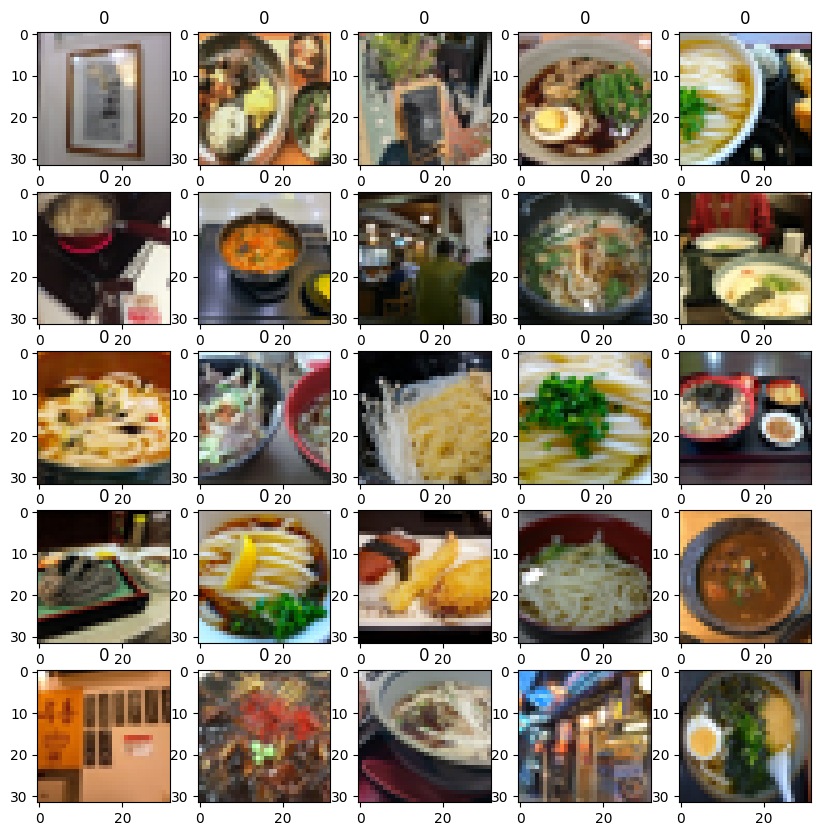

In [ ]:
#flick 사진 처리
import numpy as np
from PIL import Image
import os, glob, random

max_photo = 100
photo_size=32

files = glob.glob( "udon"+"/*.jpg")
random.shuffle(files)

num=0

for f in files:
 if num >= max_photo: break
 num +=1
 img = Image.open(f)
 img= img.convert("RGB")
 img= img.resize((photo_size, photo_size))
 img= np.asarray(img)
 x.append(img)
 y.append(0)	#label을 0으로 지정


#이미지 출력
import matplotlib.pyplot as plt
idx = 0
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.title(y[i+idx])
 plt.imshow(x[i+idx])
plt.show()



In [ ]:
train_x, test_x, train_y, test_y = train_test_split( x, y, test_size=0.2)

In [ ]:
x[0]/255

array([[[0.45882353, 0.43529412, 0.45490196],
        [0.67843137, 0.63921569, 0.68235294],
        [0.75686275, 0.72156863, 0.76862745],
        ...,
        [0.61960784, 0.58823529, 0.6       ],
        [0.60392157, 0.57254902, 0.58823529],
        [0.60784314, 0.57254902, 0.59215686]],

       [[0.46666667, 0.44705882, 0.45098039],
        [0.6745098 , 0.63921569, 0.68235294],
        [0.74117647, 0.70980392, 0.75686275],
        ...,
        [0.67058824, 0.63921569, 0.67058824],
        [0.65098039, 0.61960784, 0.65098039],
        [0.64705882, 0.61176471, 0.64313725]],

       [[0.41176471, 0.37254902, 0.40784314],
        [0.67843137, 0.64313725, 0.67843137],
        [0.72941176, 0.69803922, 0.74509804],
        ...,
        [0.67843137, 0.64705882, 0.68627451],
        [0.65882353, 0.62745098, 0.65882353],
        [0.65098039, 0.60784314, 0.64705882]],

       ...,

       [[0.5254902 , 0.50980392, 0.50588235],
        [0.51764706, 0.50196078, 0.49803922],
        [0.54117647, 0